In [253]:
import cv2         
import numpy as np   
import matplotlib.pyplot as plt

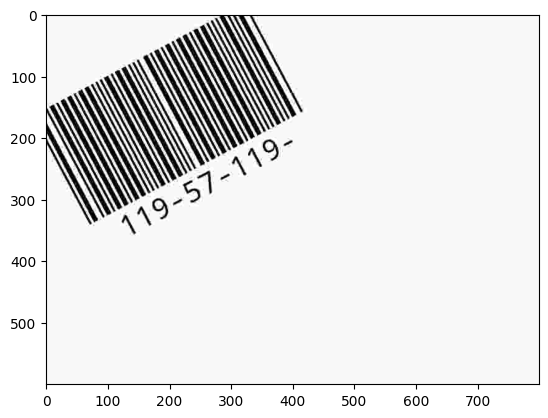

In [254]:
img = cv2.imread("Test Cases/09 - e3del el soora ya3ammm.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray , cmap='gray')
plt.show()


C:\Users\mazen\AppData\Local\Temp\ipykernel_28476\1247435243.py:14: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)
C:\Users\mazen\AppData\Local\Temp\ipykernel_28476\1247435243.py:28: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(cv2.transform(np.array([box]), rotation_matrix)[0])


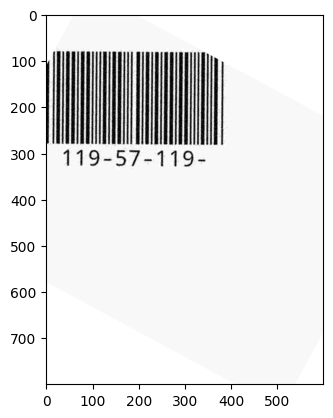

In [256]:
# Detect edges to find contours
edges = cv2.Canny(img_gray, 50, 150)

# Find contours from the edges
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour (assuming it corresponds to the barcode)
if contours:
    largest_contour = max(contours, key=cv2.contourArea)

    # Get the minimum enclosing rectangle (with rotation)
    rect = cv2.minAreaRect(largest_contour)
    box = cv2.boxPoints(rect)
    box = np.int0(box)

    # Calculate the rotation angle
    angle = rect[-1]
    if angle < -45:
        angle -= 90  # Adjust for steep angles

    # Rotate the entire image to correct the barcode's orientation
    (h, w) = img_gray.shape[:2]
    center = (w // 2, h // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img, rotation_matrix, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255))

    # Get the bounding box from the rotated rectangle
    box = np.int0(cv2.transform(np.array([box]), rotation_matrix)[0])
    x, y, w, h = cv2.boundingRect(box)

    # Ensure horizontal orientation
    if w > h:  # If the barcode is taller than it is wide, rotate by an additional 90 degrees
        rotated = cv2.rotate(rotated, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(rotated , cmap='gray')
plt.show()
        

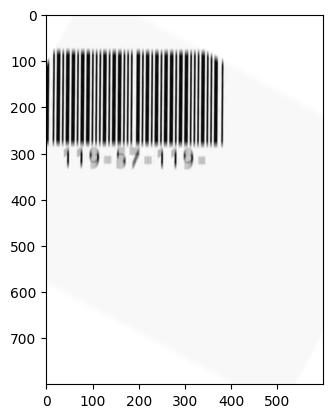

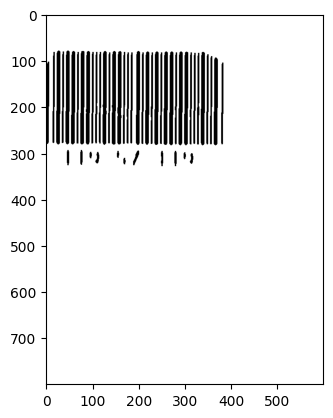

In [257]:
img_blur = cv2.blur(rotated, (1,17))
plt.imshow(img_blur, cmap='gray')
plt.show()
img_filtered = cv2.medianBlur(img_blur, 5)


if len(img_filtered.shape) == 3:
    img_filtered = cv2.cvtColor(img_filtered, cv2.COLOR_BGR2GRAY)

img_filtered = np.uint8(np.clip(img_filtered, 0, 255))

_, img_thresh = cv2.threshold(img_filtered, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(img_thresh, cmap='gray')
plt.show()



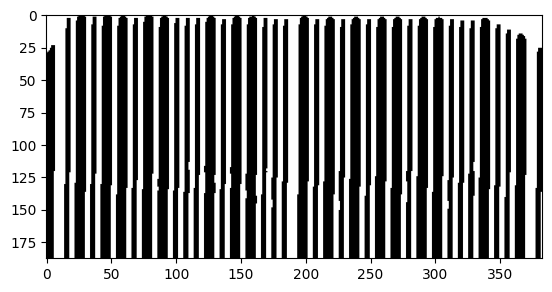

In [258]:
img_thresh_inv = cv2.bitwise_not(img_thresh)

x, y, w, h = cv2.boundingRect(img_thresh_inv)

qr_00_cropped = img_thresh[y:y+h-h//4, x:x+w]
plt.imshow(qr_00_cropped, cmap='gray')

plt.show()